# Import required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import string
import itertools
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import RNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation
from tensorflow.keras.losses import Hinge
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.models import Model

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Fake and real News Dataset loading

In [6]:
news = pd.read_csv("/content/drive/MyDrive/fake_or_real_news.csv")
news.drop('Unnamed: 0', axis=1, inplace=True)
news['label'] = news['label'].map({'FAKE': 0, 'REAL': 1})
news.head(5)

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text  label  
0  Daniel Greenfield, a Shillman Journalism Fello...      0  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0  
2  U.S. Secretary of State John F. Kerry said Mon...      1  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0  
4  It's primary day in New York and front-runners...      1

In [7]:
print (news)

                                                  title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  label  
0     Daniel Greenfield, a Shillman Journalism Fello...      0  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...      0  
2     U.S. Secretary of State John F. Kerry said Mon...      1  
3     — Kaydee King (@KaydeeKin

In [8]:
print(news.shape)

(6335, 3)


In [9]:
news.count()

title    6335
text     6335
label    6335
dtype: int64

In [10]:
news.dtypes

title    object
text     object
label     int64
dtype: object

In [11]:
news.describe()

label
count  6335.000000
mean      0.500552
std       0.500039
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

In [12]:
news

title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  label  
0     Daniel Greenfield, a Shillman Journalism Fello...      0  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...      0  
2     U.S. Secretary of State John F. Kerry said Mon...      1  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...      0  
4     It's primary day in New York and front-runners...      1  
...                                                 ...    ...  
6330  The State Department told the Republican Natio...      1  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...      0  
6332   Anti-Trump Protesters Are Tools of the Oligar...      0  
6333  ADDIS ABABA, Ethiopia —President Obama convene...      1  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...      1  

[6335 rows x 3 columns]

In [13]:
encoded_data = news
reduced_data = encoded_data

In [14]:
reduced_data.head(10)

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   
5                                        Tehran, USA   
6  Girl Horrified At What She Watches Boyfriend D...   
7                  ‘Britain’s Schindler’ Dies at 106   
8  Fact check: Trump and Clinton at the 'commande...   
9  Iran reportedly makes new push for uranium con...   

                                                text  label  
0  Daniel Greenfield, a Shillman Journalism Fello...      0  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0  
2  U.S. Secretary of State John F. Kerry said Mon...      1  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0  
4  It's primary day in New York and front-runners...      1  
5    \nI’m not an immigrant, but my grandparents ...      0  
6  Share This Baylee Luciani (left), Screenshot o...      0  
7  A Czech stockbroker who saved more than 650 Je...      1  
8  Hillary Clinton and Donald Trump made some ina...      1  
9  Iranian negotiators reportedly have made a las...      1

In [15]:
cleaned_data = reduced_data
cleaned_data.head(5)

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text  label  
0  Daniel Greenfield, a Shillman Journalism Fello...      0  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0  
2  U.S. Secretary of State John F. Kerry said Mon...      1  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0  
4  It's primary day in New York and front-runners...      1

### Text Preprocessing removing URL, HTML, Unnecessary texts, integers, emojis, punctuation etc

In [16]:
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

In [17]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def text_cleaning(text):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    return text

In [18]:
def number_cleaning(text):
    text = ''.join(c for c in text if not c.isdigit())
    return text

In [19]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F" #emoticons
        u"\U0001F300-\U0001F5FF" #symbols & pictographs
        u"\U0001F680-\U0001F6FF" #transport & map symbols
        u"\U0001F1E0-\U0001F1FF" #FLAGS on (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

In [20]:
def remove_punctuation(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [21]:
def stemming_words(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [22]:
stop = set(stopwords.words("english"))

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

In [23]:
MAX_SEQUENCE_LENGTH = 400
MAX_NB_WORDS = 10000
EMBEDDING_DIM = 200
VALIDATION_SPLIT = 0.2

In [24]:
texts = []
labels = []

for i in range(cleaned_data.text.shape[0]):
    text1 =cleaned_data.title	[i]
    text2 = cleaned_data.text[i]
    text = str(text1) +""+ str(text2)
    texts.append(text)
    labels.append(cleaned_data.label[i])

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 104308 unique tokens.


In [25]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = keras.utils.np_utils.to_categorical(np.asarray(labels),num_classes = 2)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (6335, 400)
Shape of label tensor: (6335, 2)


In [26]:
# Train test validation Split
from sklearn.model_selection import train_test_split

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train, x_test, y_train, y_test = train_test_split( data, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split( x_test, y_test, test_size=0.80, random_state=42)
print('Size of train, test:', len(y_train), len(y_val), len(y_test))

print('real & fake news in train, test:')
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))
print(y_test.sum(axis=0))

Size of train, test: 5068 1014 253
real & fake news in train, test:
[2519. 2549.]
[516. 498.]
[129. 124.]


In [27]:
cleaned_data.head(5)

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text  label  
0  Daniel Greenfield, a Shillman Journalism Fello...      0  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0  
2  U.S. Secretary of State John F. Kerry said Mon...      1  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0  
4  It's primary day in New York and front-runners...      1

In [28]:
cleaned_data.text

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

### Split the Dataset

In [29]:
train_size = 0.8

In [30]:
train_data, test_data = train_test_split(cleaned_data, test_size=1-train_size,
                                         random_state=7)

print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 5068
Test Data size 1267


In [31]:
train_data.head(10)

title  \
6237  Shock Claim: Nibiru Will Hit In 2017- World Go...   
3722  Spirit to thank veterans at annual Veterans Da...   
5774  Obese Woman Loses More Than 100 Kilograms Afte...   
336   “I’m glad that he won”: The surprising Palesti...   
3622  John Kasich wooing Iowans mostly from New Hamp...   
4024  Obama Administration Mandate Ordering "Sex Cha...   
1537  Tesla, ‘World’s Safest Car,’ Explodes Like a Bomb   
5200  Why Hillary Clinton is unlikely to be indicted...   
279   American Express disowns Pink Floyd singer Rog...   
4973  Comment on Why We’re All Deficient In Magnesiu...   

                                                   text  label  
6237  The head of a leading survivalist group has ma...      0  
3722  ‹ › Arnaldo Rodgers is a trained and educated ...      0  
5774  Patty Sanchez, 51, used to eat 13,000 calories...      0  
336   But Benjamin Netanyahu’s reelection was regard...      1  
3622  John Kasich was killing it with these Iowa vot...      1  
4024  Email \nIt has become increasingly apparent th...      0  
1537  Tesla, ‘World’s Safest Car,’ Explodes Like a B...      0  
5200  For those of you salivating — or trembling — a...      1  
279   American Express disowns Pink Floyd singer Rog...      0  
4973  Osteoporosis (yes, magnesium is more important...      0

### Tokenisation, training datsets, sequences, padding

In [32]:
vocabulary_size = 100000
max_word_length = 600
oov_tk = "<OOV>"
trunc_type='post'
padding_type='post'

In [33]:
tokenizer = Tokenizer(num_words = vocabulary_size, oov_token = oov_tk)
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

print("Vocabulary Size :", vocab_size)

Vocabulary Size : 88123


In [34]:
train_sequences = tokenizer.texts_to_sequences(train_data.text	)
test_sequences = tokenizer.texts_to_sequences(test_data.text	)

In [35]:
x_train = pad_sequences(train_sequences, maxlen=max_word_length, padding=padding_type, truncating=trunc_type)
x_test = pad_sequences(test_sequences, maxlen=max_word_length, padding=padding_type, truncating=trunc_type)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (5068, 600)
Testing X Shape: (1267, 600)


### Label Encoding

In [36]:
labels = train_data.label.unique().tolist()

In [37]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (5068, 1)
y_test shape: (1267, 1)


In [38]:
vocabulary_size =len(word_index)
print('The size of the news dataset vocabulary is: ', vocabulary_size)

The size of the news dataset vocabulary is:  88122


In [39]:
training_sequence = x_train.shape[1]
print('The length of training sequence is: ', training_sequence)

The length of training sequence is:  600


In [40]:
print('The length of testing sequence is: ', x_test.shape[1])

The length of testing sequence is:  600


### Pretrained GloVe.6B.200 word embedding

In [41]:
embeddings_index = {}

with open("/content/drive/MyDrive/glove.6B.200d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [42]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88122 unique tokens.


In [43]:
embeddings_index

{'the': array([-7.1549e-02,  9.3459e-02,  2.3738e-02, -9.0339e-02,  5.6123e-02,
         3.2547e-01, -3.9796e-01, -9.2139e-02,  6.1181e-02, -1.8950e-01,
         1.3061e-01,  1.4349e-01,  1.1479e-02,  3.8158e-01,  5.4030e-01,
        -1.4088e-01,  2.4315e-01,  2.3036e-01, -5.5339e-01,  4.8154e-02,
         4.5662e-01,  3.2338e+00,  2.0199e-02,  4.9019e-02, -1.4132e-02,
         7.6017e-02, -1.1527e-01,  2.0060e-01, -7.7657e-02,  2.4328e-01,
         1.6368e-01, -3.4118e-01, -6.6070e-02,  1.0152e-01,  3.8232e-02,
        -1.7668e-01, -8.8153e-01, -3.3895e-01, -3.5481e-02, -5.5095e-01,
        -1.6899e-02, -4.3982e-01,  3.9004e-02,  4.0447e-01, -2.5880e-01,
         6.4594e-01,  2.6641e-01,  2.8009e-01, -2.4625e-02,  6.3302e-01,
        -3.1700e-01,  1.0271e-01,  3.0886e-01,  9.7792e-02, -3.8227e-01,
         8.6552e-02,  4.7075e-02,  2.3511e-01, -3.2127e-01, -2.8538e-01,
         1.6670e-01, -4.9707e-03, -6.2714e-01, -2.4904e-01,  2.9713e-01,
         1.4379e-01, -1.2325e-01, -5.8178e-0

In [44]:
num_words = len(word_index) + 1
embedding_dimension = 200

embedding_matrix = np.zeros((vocab_size, embedding_dimension))

for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [45]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.071549  ,  0.093459  ,  0.023738  , ...,  0.33616999,
         0.030591  ,  0.25577   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.55874002,  0.38765001,  0.31402001, ..., -0.61528999,
        -0.074858  , -0.65059   ]])

In [46]:
word_index["good"]

202

In [47]:
embeddings_index.get("good")

array([ 5.1507e-01,  3.5596e-01,  1.5710e-01, -7.4075e-02, -2.5446e-01,
       -1.1357e-01, -4.9943e-01, -1.2626e-01,  3.8851e-01,  5.4204e-01,
        1.0479e-01,  4.4099e-01, -6.5490e-02,  5.8463e-02,  4.1150e-01,
        5.6709e-01, -1.1869e-01,  2.5107e-01,  2.5640e-01, -2.1615e-01,
        6.4170e-01,  2.7875e+00,  1.2036e-01,  4.9481e-02,  2.4843e-01,
       -6.7390e-01,  1.1957e-03,  3.5802e-01, -1.7588e-01, -3.9135e-01,
       -1.4093e-02,  2.3610e-01, -4.3184e-01, -2.7045e-02,  2.2829e-02,
       -2.8283e-01, -5.0008e-01, -1.1275e-01, -4.5002e-01,  3.3634e-01,
       -5.7722e-03,  3.3005e-01, -2.4671e-01,  1.7358e-01, -3.5508e-01,
       -3.9378e-02,  4.8834e-01,  1.4180e-01, -1.7579e-01,  3.1760e-01,
       -1.5194e-01, -1.1244e-01, -7.0078e-02,  7.4877e-01, -6.2074e-02,
       -1.7296e-01,  1.5001e-01, -5.8035e-02,  1.9471e-01, -2.9521e-01,
        5.0281e-01, -3.3074e-01, -5.4041e-01,  6.4659e-02,  4.1465e-02,
        4.9930e-01,  8.0902e-02,  4.7806e-01,  5.8307e-01,  4.08

In [48]:
(embedding_matrix[202] == embeddings_index.get("good")).all()

True

### Analysing the shapes of training and testing datasets

In [49]:
print(x_train.shape)
print(y_train.shape)

(5068, 600)
(5068, 1)


In [50]:
print(x_test.shape)
print(y_test.shape)

(1267, 600)
(1267, 1)


In [51]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on GPU...


### Employ LSTM

In [52]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),

    tf.keras.layers.SpatialDropout1D(0.20),
    tf.keras.layers.LSTM((128), return_sequences=True),
    tf.keras.layers.LSTM((128)),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, kernel_regularizer=l2(0.01)),
    tf.keras.layers.Activation('linear')
])

In [53]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 200)          17624600  
                                                                 
 spatial_dropout1d (SpatialD  (None, 600, 200)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 600, 128)          168448    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                        

### Model training 

In [54]:
number_of_epochs = 25
batch_size = 256

LSTM_history = model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
20/20 [==============================] - 8s 173ms/step - loss: 1.2803 - accuracy: 0.5691 - val_loss: 0.7775 - val_accuracy: 0.6306
Epoch 2/25
20/20 [==============================] - 3s 132ms/step - loss: 0.7355 - accuracy: 0.6196 - val_loss: 0.6920 - val_accuracy: 0.6283
Epoch 3/25
20/20 [==============================] - 3s 134ms/step - loss: 0.6858 - accuracy: 0.6354 - val_loss: 0.6701 - val_accuracy: 0.6354
Epoch 4/25
20/20 [==============================] - 3s 133ms/step - loss: 0.6715 - accuracy: 0.6381 - val_loss: 0.6653 - val_accuracy: 0.6330
Epoch 5/25
20/20 [==============================] - 3s 134ms/step - loss: 0.6573 - accuracy: 0.6498 - val_loss: 0.6588 - val_accuracy: 0.6425
Epoch 6/25
20/20 [==============================] - 3s 134ms/step - loss: 0.6968 - accuracy: 0.6117 - val_loss: 0.8057 - val_accuracy: 0.5036
Epoch 7/25
20/20 [==============================] - 3s 134ms/step - loss: 0.7098 - accuracy: 0.6018 - val_loss: 0.6738 - val_accuracy: 0.6354
Epoch 

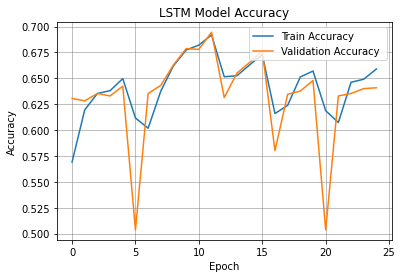

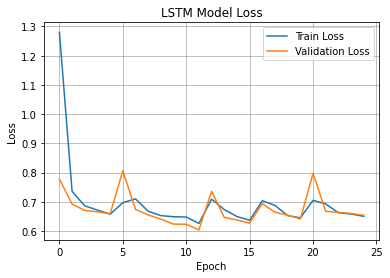

In [55]:
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy '], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()


plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

40/40 [==============================] - 1s 33ms/step - loss: 0.6534 - accuracy: 0.6409
Test Loss: 0.6534082889556885
Test Accuracy: 0.6408839821815491


In [57]:
model_scores = model.predict(x_test, verbose=1, batch_size=256)

5/5 [==============================] - 1s 45ms/step


In [58]:
model_scores

array([[0.36862612],
       [0.36864007],
       [0.7227935 ],
       ...,
       [0.3686291 ],
       [0.67092466],
       [0.36862612]], dtype=float32)

In [59]:
LSTM_y_pred=np.where(model_scores>0.5,1,0)

In [60]:
LSTM_y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [61]:
print(accuracy_score(y_test, LSTM_y_pred))

0.6408839779005525


In [62]:
print(classification_report(y_test, LSTM_y_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       638
           1       0.63      0.67      0.65       629

    accuracy                           0.64      1267
   macro avg       0.64      0.64      0.64      1267
weighted avg       0.64      0.64      0.64      1267



### confusion_matrix

In [63]:
LSTM_CM=confusion_matrix(y_test, LSTM_y_pred)
print(LSTM_CM)

[[389 249]
 [206 423]]


In [64]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[389 249]
 [206 423]]


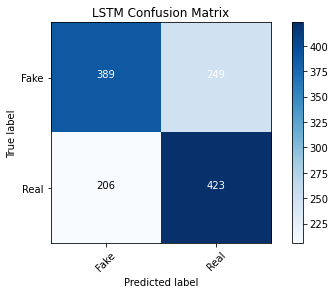

In [65]:
categories = ['Fake','Real']
LSTM_cnf_matrix = confusion_matrix(y_test, LSTM_y_pred)
plot_confusion_matrix(cm=LSTM_cnf_matrix, classes=categories, title='LSTM Confusion Matrix')
plt.show()

### CNN Model 

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 4, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [67]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 200)          17624600  
                                                                 
 dropout_1 (Dropout)         (None, 600, 200)          0         
                                                                 
 conv1d (Conv1D)             (None, 597, 64)           51264     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 298, 64)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 2)                528       
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                

### Model training 

In [68]:
number_of_epochs = 25
batch_size = 256

CNN_history = model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
20/20 [==============================] - 8s 148ms/step - loss: 0.6743 - accuracy: 0.5335 - val_loss: 0.6527 - val_accuracy: 0.5675
Epoch 2/25
20/20 [==============================] - 1s 45ms/step - loss: 0.6622 - accuracy: 0.5817 - val_loss: 0.7208 - val_accuracy: 0.4696
Epoch 3/25
20/20 [==============================] - 1s 45ms/step - loss: 0.6551 - accuracy: 0.6040 - val_loss: 0.6077 - val_accuracy: 0.6882
Epoch 4/25
20/20 [==============================] - 1s 47ms/step - loss: 0.5868 - accuracy: 0.7307 - val_loss: 0.5625 - val_accuracy: 0.7616
Epoch 5/25
20/20 [==============================] - 1s 49ms/step - loss: 0.5841 - accuracy: 0.7214 - val_loss: 0.6599 - val_accuracy: 0.6085
Epoch 6/25
20/20 [==============================] - 1s 46ms/step - loss: 0.6316 - accuracy: 0.6363 - val_loss: 0.6102 - val_accuracy: 0.6803
Epoch 7/25
20/20 [==============================] - 1s 47ms/step - loss: 0.5852 - accuracy: 0.7356 - val_loss: 0.5715 - val_accuracy: 0.7632
Epoch 8/25
2

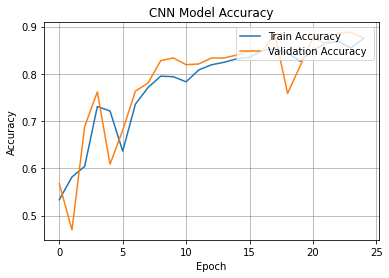

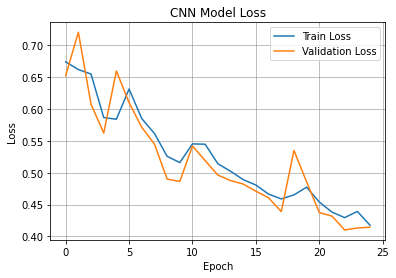

In [69]:
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy '], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()


plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [70]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

40/40 [==============================] - 0s 11ms/step - loss: 0.4145 - accuracy: 0.8761
Test Loss: 0.41449037194252014
Test Accuracy: 0.8760852217674255


In [71]:
CNN_scores = model.predict(x_test, verbose=1, batch_size=256)

5/5 [==============================] - 1s 16ms/step


In [72]:
CNN_scores

array([[0.6896996 ],
       [0.23809643],
       [0.75204355],
       ...,
       [0.68244845],
       [0.29728448],
       [0.6887047 ]], dtype=float32)

In [73]:
CNN_y_pred=np.where(CNN_scores>0.5,1,0)

In [74]:
CNN_y_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [75]:
print(accuracy_score(y_test, CNN_y_pred))

0.8760852407261247


In [76]:
print(classification_report(y_test, CNN_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       638
           1       0.82      0.97      0.89       629

    accuracy                           0.88      1267
   macro avg       0.89      0.88      0.88      1267
weighted avg       0.89      0.88      0.88      1267



### confusion_matrix

In [77]:
CNN_CM=confusion_matrix(y_test, CNN_y_pred)
print(CNN_CM)

[[503 135]
 [ 22 607]]


In [78]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[503 135]
 [ 22 607]]


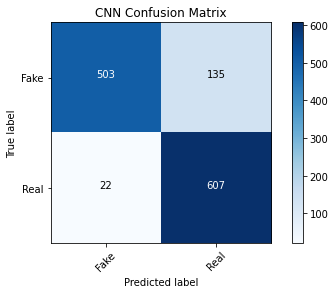

In [79]:
categories = ['Fake','Real']
CNN_cnf_matrix = confusion_matrix(y_test, CNN_y_pred)
plot_confusion_matrix(cm=CNN_cnf_matrix, classes=categories, title='CNN Confusion Matrix')
plt.show()

### BiLSTM_RNN(Bahad et al., 2019)

In [80]:
BiLSTM_RNN_model= tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),

    tf.keras.layers.SpatialDropout1D(0.20),
    tf.keras.layers.LSTM((128), return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM((256)),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1, kernel_regularizer=l2(0.01)),
    tf.keras.layers.Activation('linear')
])

In [81]:
BiLSTM_RNN_model.compile(loss=tf.keras.losses.Hinge(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [82]:
BiLSTM_RNN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [83]:
print(BiLSTM_RNN_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 600, 200)          17624600  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 600, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 600, 128)          168448    
                                                                 
 dropout_2 (Dropout)         (None, 600, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

### Model Training 

In [84]:
number_of_epochs = 25
batch_size = 256

BiLSTM_RNN_history = BiLSTM_RNN_model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
20/20 [==============================] - 8s 257ms/step - loss: 2.0197 - accuracy: 0.5604 - val_loss: 0.7323 - val_accuracy: 0.6330
Epoch 2/25
20/20 [==============================] - 4s 221ms/step - loss: 0.7038 - accuracy: 0.6273 - val_loss: 0.6724 - val_accuracy: 0.6440
Epoch 3/25
20/20 [==============================] - 4s 222ms/step - loss: 0.6682 - accuracy: 0.6407 - val_loss: 0.6596 - val_accuracy: 0.6448
Epoch 4/25
20/20 [==============================] - 4s 222ms/step - loss: 0.6582 - accuracy: 0.6502 - val_loss: 0.6514 - val_accuracy: 0.6527
Epoch 5/25
20/20 [==============================] - 4s 222ms/step - loss: 0.6927 - accuracy: 0.6178 - val_loss: 0.7493 - val_accuracy: 0.5059
Epoch 6/25
20/20 [==============================] - 4s 224ms/step - loss: 0.7038 - accuracy: 0.5955 - val_loss: 0.6774 - val_accuracy: 0.6267
Epoch 7/25
20/20 [==============================] - 4s 223ms/step - loss: 0.6720 - accuracy: 0.6383 - val_loss: 0.6687 - val_accuracy: 0.6369
Epoch 

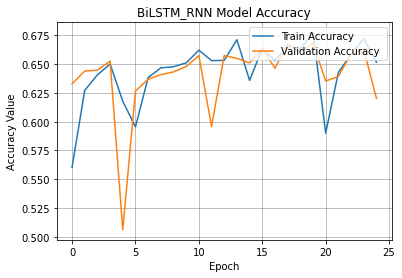

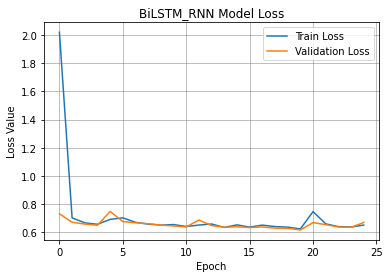

In [85]:
plt.plot(BiLSTM_RNN_history.history['accuracy'])
plt.plot(BiLSTM_RNN_history.history['val_accuracy'])
plt.title('BiLSTM_RNN Model Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy '], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()


plt.plot(BiLSTM_RNN_history.history['loss'])
plt.plot(BiLSTM_RNN_history.history['val_loss'])
plt.title('BiLSTM_RNN Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [86]:
test_loss, test_acc = BiLSTM_RNN_model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

40/40 [==============================] - 1s 24ms/step - loss: 0.6709 - accuracy: 0.6204
Test Loss: 0.6708953976631165
Test Accuracy: 0.6203630566596985


In [87]:
BiLSTM_RNN_scores = BiLSTM_RNN_model.predict(x_test, verbose=1, batch_size=256)

5/5 [==============================] - 1s 71ms/step


In [88]:
BiLSTM_RNN_scores

array([[0.31853867],
       [0.31853867],
       [0.41347605],
       ...,
       [0.31853867],
       [0.4534914 ],
       [0.31853867]], dtype=float32)

In [89]:
BiLSTM_RNN_y_pred=np.where(BiLSTM_RNN_scores>0.5,1,0)

In [90]:
BiLSTM_RNN_y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [91]:
print(accuracy_score(y_test, BiLSTM_RNN_y_pred))

0.6203630623520127


In [92]:
print(classification_report(y_test, BiLSTM_RNN_y_pred))

              precision    recall  f1-score   support

           0       0.58      0.93      0.71       638
           1       0.82      0.30      0.44       629

    accuracy                           0.62      1267
   macro avg       0.70      0.62      0.58      1267
weighted avg       0.70      0.62      0.58      1267



### confusion_matrix

In [93]:
BiLSTM_RNN_CM=confusion_matrix(y_test,BiLSTM_RNN_y_pred)
print(BiLSTM_RNN_CM)

[[595  43]
 [438 191]]


In [94]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[595  43]
 [438 191]]


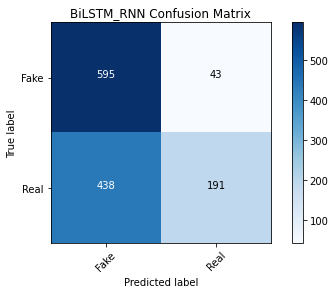

In [95]:
categories = ['Fake','Real']
BiLSTM_RNN_cnf_matrix = confusion_matrix(y_test, BiLSTM_RNN_y_pred)
plot_confusion_matrix(cm=BiLSTM_RNN_cnf_matrix, classes=categories, title='BiLSTM_RNN Confusion Matrix')
plt.show()

### Model ROC Curve

In [96]:
from sklearn import metrics

In [97]:
BiLSTM_RNN_fpr, BiLSTM_RNN_tpr, _ = metrics.roc_curve(y_test,BiLSTM_RNN_y_pred)
BiLSTM_RNN_roc_auc = metrics.auc(BiLSTM_RNN_fpr, BiLSTM_RNN_tpr)

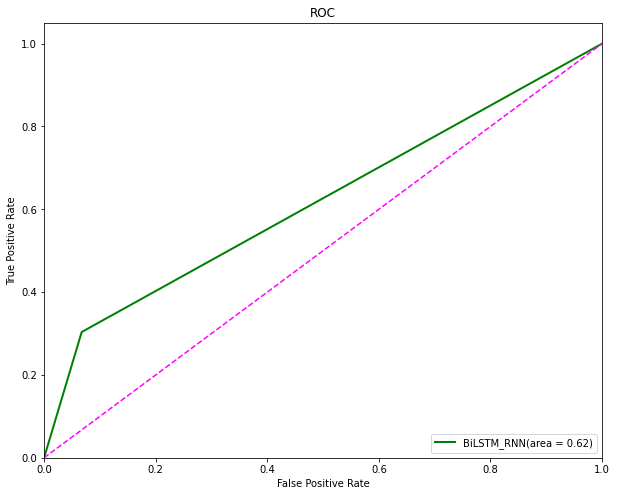

In [98]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(BiLSTM_RNN_fpr, BiLSTM_RNN_tpr, color='green', lw=lw, label='BiLSTM_RNN(area = %0.2f)' % BiLSTM_RNN_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### LSTM-RNN (T. Ahmed et al 2022)

In [99]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),

    tf.keras.layers.SpatialDropout1D(0.20),
    tf.keras.layers.LSTM((128), return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM((64)),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, kernel_regularizer=l2(0.01)),
    tf.keras.layers.Activation('linear')
])
model.compile(loss=tf.keras.losses.Hinge(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 600, 200)          17624600  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 600, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 600, 128)          168448    
                                                                 
 dropout_4 (Dropout)         (None, 600, 128)          0         
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                      

### Model Training 

In [100]:
number_of_epochs = 25
batch_size = 256

LSTM_RNN_history = model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
20/20 [==============================] - 6s 162ms/step - loss: 0.9945 - accuracy: 0.5004 - val_loss: 0.9540 - val_accuracy: 0.5399
Epoch 2/25
20/20 [==============================] - 2s 121ms/step - loss: 0.9311 - accuracy: 0.5843 - val_loss: 0.8889 - val_accuracy: 0.6330
Epoch 3/25
20/20 [==============================] - 2s 121ms/step - loss: 0.8898 - accuracy: 0.6379 - val_loss: 0.8899 - val_accuracy: 0.6330
Epoch 4/25
20/20 [==============================] - 2s 122ms/step - loss: 0.8858 - accuracy: 0.6387 - val_loss: 0.8736 - val_accuracy: 0.6330
Epoch 5/25
20/20 [==============================] - 2s 122ms/step - loss: 0.8679 - accuracy: 0.6377 - val_loss: 0.8560 - val_accuracy: 0.6330
Epoch 6/25
20/20 [==============================] - 3s 128ms/step - loss: 0.8338 - accuracy: 0.6425 - val_loss: 0.7818 - val_accuracy: 0.6322
Epoch 7/25
20/20 [==============================] - 2s 121ms/step - loss: 0.7715 - accuracy: 0.6466 - val_loss: 0.7651 - val_accuracy: 0.6346
Epoch 

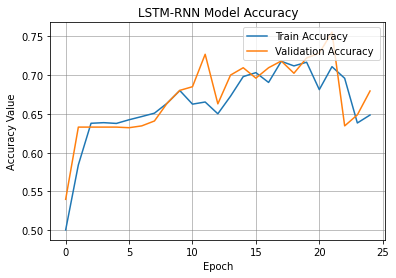

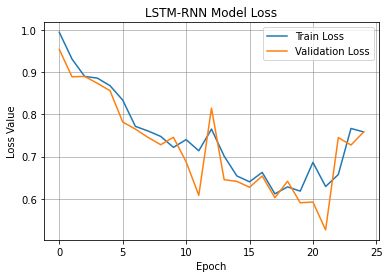

In [101]:
plt.plot(LSTM_RNN_history.history['accuracy'])
plt.plot(LSTM_RNN_history.history['val_accuracy'])
plt.title('LSTM-RNN Model Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy '], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()


plt.plot(LSTM_RNN_history.history['loss'])
plt.plot(LSTM_RNN_history.history['val_loss'])
plt.title('LSTM-RNN Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [102]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

40/40 [==============================] - 1s 21ms/step - loss: 0.7583 - accuracy: 0.6796
Test Loss: 0.7582745552062988
Test Accuracy: 0.6795580387115479


In [103]:
model_scores = model.predict(x_test, verbose=1, batch_size=256)

5/5 [==============================] - 1s 38ms/step


In [104]:
model_y_pred=np.where(model_scores>0.5,1,0)

In [105]:
model_y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [106]:
print(accuracy_score(y_test, model_y_pred))

0.6795580110497238


In [107]:
print(classification_report(y_test, model_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       638
           1       0.69      0.64      0.66       629

    accuracy                           0.68      1267
   macro avg       0.68      0.68      0.68      1267
weighted avg       0.68      0.68      0.68      1267



### confusion_matrix

In [108]:
model_CM=confusion_matrix(y_test, model_y_pred)
print(model_CM)

[[460 178]
 [228 401]]


In [109]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[460 178]
 [228 401]]


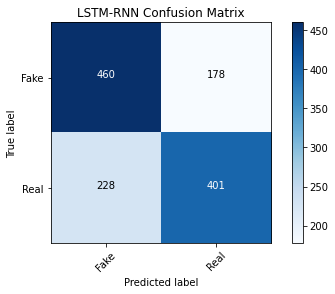

In [110]:
categories = ['Fake','Real']
LSTM_RNN_cnf_matrix = confusion_matrix(y_test, model_y_pred)
plot_confusion_matrix(cm=LSTM_RNN_cnf_matrix, classes=categories, title='LSTM-RNN Confusion Matrix')
plt.show()

### Model ROC Curve

In [111]:
from sklearn import metrics

In [112]:
LSTM_RNN_fpr, LSTM_RNN_tpr, _ = metrics.roc_curve(y_test,model_y_pred)
LSTM_RNN_roc_auc = metrics.auc(LSTM_RNN_fpr, LSTM_RNN_tpr)

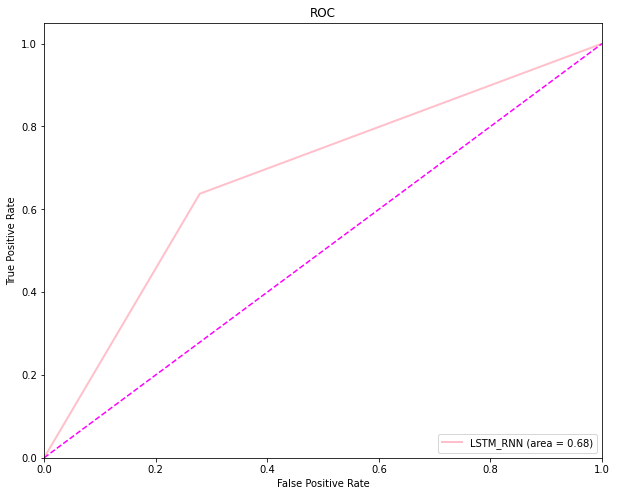

In [113]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(LSTM_RNN_fpr, LSTM_RNN_tpr, color='pink', lw=lw, label='LSTM_RNN (area = %0.2f)' % LSTM_RNN_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### BiLSTM_CNN (Nasir, Khan et al, 2021)

In [114]:

BiLSTM_CNN_model = model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension,
                              weights=[embedding_matrix],
                              input_length=max_word_length,
                              trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
   tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(256, 4, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [115]:
BiLSTM_CNN_model.compile(loss=tf.keras.losses.Hinge(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
print(BiLSTM_CNN_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 600, 200)          17624600  
                                                                 
 conv1d_1 (Conv1D)           (None, 596, 64)           64064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 149, 64)          0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 149, 64)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 145, 128)          41088     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 36, 128)          0         
 1D)                                                  

### model training 

In [116]:
number_of_epochs = 25
batch_size = 256
BiLSTM_CNN_history = BiLSTM_CNN_model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
20/20 [==============================] - 6s 98ms/step - loss: 0.9508 - accuracy: 0.6330 - val_loss: 0.9330 - val_accuracy: 0.6259
Epoch 2/25
20/20 [==============================] - 1s 44ms/step - loss: 0.8969 - accuracy: 0.6415 - val_loss: 0.8971 - val_accuracy: 0.6385
Epoch 3/25
20/20 [==============================] - 1s 44ms/step - loss: 0.8714 - accuracy: 0.6433 - val_loss: 0.8816 - val_accuracy: 0.6393
Epoch 4/25
20/20 [==============================] - 1s 44ms/step - loss: 0.8606 - accuracy: 0.6464 - val_loss: 0.8740 - val_accuracy: 0.6369
Epoch 5/25
20/20 [==============================] - 1s 45ms/step - loss: 0.8517 - accuracy: 0.6476 - val_loss: 0.8656 - val_accuracy: 0.6409
Epoch 6/25
20/20 [==============================] - 1s 45ms/step - loss: 0.8268 - accuracy: 0.6661 - val_loss: 0.8210 - val_accuracy: 0.7009
Epoch 7/25
20/20 [==============================] - 1s 45ms/step - loss: 0.7940 - accuracy: 0.7149 - val_loss: 0.8239 - val_accuracy: 0.6772
Epoch 8/25
20

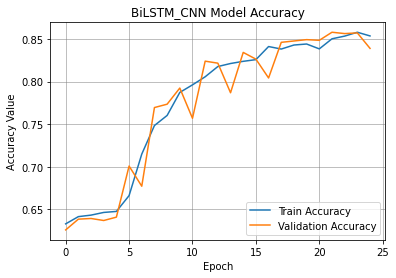

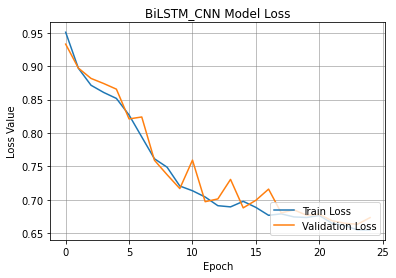

In [117]:
plt.plot(BiLSTM_CNN_history.history['accuracy'])
plt.plot(BiLSTM_CNN_history.history['val_accuracy'])
plt.title('BiLSTM_CNN Model Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

plt.plot(BiLSTM_CNN_history.history['loss'])
plt.plot(BiLSTM_CNN_history.history['val_loss'])
plt.title('BiLSTM_CNN Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='lower right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [118]:
test_loss, test_acc = BiLSTM_CNN_model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

40/40 [==============================] - 0s 8ms/step - loss: 0.6732 - accuracy: 0.8390
Test Loss: 0.6731567978858948
Test Accuracy: 0.8389897346496582


In [119]:
BiLSTM_CNN_scores = BiLSTM_CNN_model.predict(x_test, verbose=1, batch_size=256)

5/5 [==============================] - 1s 15ms/step


In [120]:
BiLSTM_CNN_scores

array([[0.99444973],
       [0.00182605],
       [0.9544595 ],
       ...,
       [0.9749371 ],
       [0.974035  ],
       [0.9973901 ]], dtype=float32)

In [121]:
BiLSTM_CNN_y_pred=np.where(BiLSTM_CNN_scores>0.5,1,0)

In [122]:
BiLSTM_CNN_y_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [123]:
print(accuracy_score(y_test, BiLSTM_CNN_y_pred))

0.8389897395422258


In [124]:
print(classification_report(y_test, BiLSTM_CNN_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       638
           1       0.78      0.94      0.85       629

    accuracy                           0.84      1267
   macro avg       0.85      0.84      0.84      1267
weighted avg       0.85      0.84      0.84      1267



### confusion_matrix

In [125]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[473 165]
 [ 39 590]]


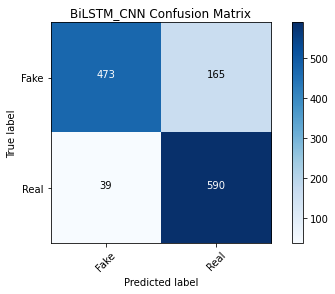

In [126]:
categories = ['Fake','Real']
BiLSTM_CNN_cnf_matrix = confusion_matrix(y_test, BiLSTM_CNN_y_pred)
plot_confusion_matrix(cm=BiLSTM_CNN_cnf_matrix, classes=categories, title='BiLSTM_CNN Confusion Matrix')
plt.show()

### Model ROC Curve 

In [127]:
BiLSTM_CNN_fpr, BiLSTM_CNN_tpr, _ = metrics.roc_curve(y_test,BiLSTM_CNN_y_pred)
BiLSTM_CNN_roc_auc = metrics.auc(BiLSTM_CNN_fpr, BiLSTM_CNN_tpr)

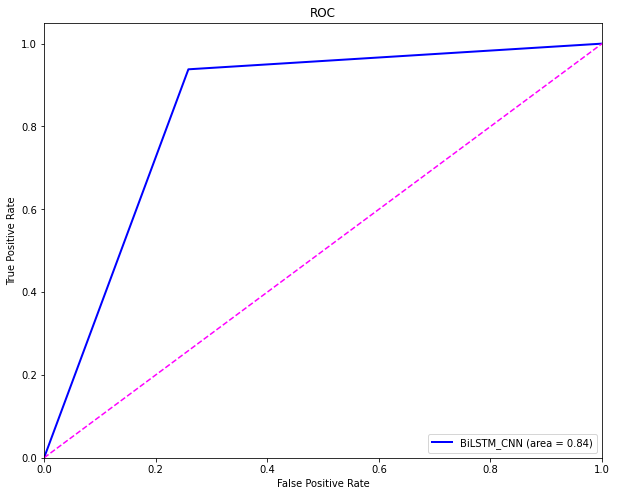

In [128]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(BiLSTM_CNN_fpr, BiLSTM_CNN_tpr, color='blue', lw=lw, label='BiLSTM_CNN (area = %0.2f)' % BiLSTM_CNN_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### BLD-GRU (Hansrajh et al., 2021)

In [129]:
BLD_GRU_model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dimension, 
                            weights=[embedding_matrix], 
                            input_length=max_word_length, 
                            trainable=False),
    
    tf.keras.layers.SpatialDropout1D(0.10),
    tf.keras.layers.GRU((128), return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.GRU((128)),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, kernel_regularizer=l2(0.01)),
    tf.keras.layers.Activation('linear')
])

In [130]:
BLD_GRU_model.compile(loss=tf.keras.losses.Hinge(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [131]:
BLD_GRU_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [132]:
print(BLD_GRU_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 600, 200)          17624600  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 600, 200)         0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 600, 128)          126720    
                                                                 
 dropout_7 (Dropout)         (None, 600, 128)          0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                      

### Model Training 

In [133]:
number_of_epochs = 25
batch_size = 256

BLD_GRU_history = BLD_GRU_model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
20/20 [==============================] - 6s 160ms/step - loss: 1.3799 - accuracy: 0.5848 - val_loss: 0.6790 - val_accuracy: 0.6290
Epoch 2/25
20/20 [==============================] - 3s 129ms/step - loss: 0.7206 - accuracy: 0.6182 - val_loss: 0.6769 - val_accuracy: 0.6322
Epoch 3/25
20/20 [==============================] - 2s 124ms/step - loss: 0.6743 - accuracy: 0.6358 - val_loss: 0.6970 - val_accuracy: 0.5738
Epoch 4/25
20/20 [==============================] - 2s 125ms/step - loss: 0.6717 - accuracy: 0.6334 - val_loss: 0.6652 - val_accuracy: 0.6369
Epoch 5/25
20/20 [==============================] - 2s 125ms/step - loss: 0.6701 - accuracy: 0.6500 - val_loss: 0.6606 - val_accuracy: 0.6338
Epoch 6/25
20/20 [==============================] - 2s 125ms/step - loss: 0.6639 - accuracy: 0.6442 - val_loss: 0.6524 - val_accuracy: 0.6488
Epoch 7/25
20/20 [==============================] - 2s 125ms/step - loss: 0.6815 - accuracy: 0.6468 - val_loss: 0.6999 - val_accuracy: 0.5659
Epoch 

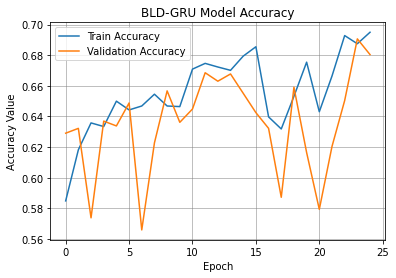

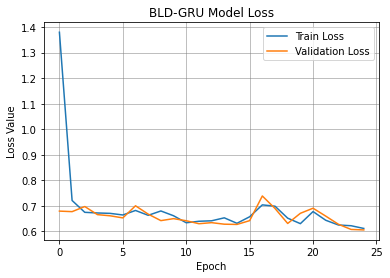

In [134]:
plt.plot(BLD_GRU_history.history['accuracy'])
plt.plot(BLD_GRU_history.history['val_accuracy'])
plt.title('BLD-GRU Model Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

plt.plot(BLD_GRU_history.history['loss'])
plt.plot(BLD_GRU_history.history['val_loss'])
plt.title('BLD-GRU Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [135]:
test_loss, test_acc = BLD_GRU_model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

40/40 [==============================] - 1s 18ms/step - loss: 0.6053 - accuracy: 0.6803
Test Loss: 0.6053232550621033
Test Accuracy: 0.6803472638130188


In [136]:
BLD_GRU_scores = BLD_GRU_model.predict(x_test, verbose=1, batch_size=64)

20/20 [==============================] - 1s 25ms/step


In [137]:
BLD_GRU_scores

array([[0.35809863],
       [0.3580986 ],
       [0.6888226 ],
       ...,
       [0.3580986 ],
       [0.52726656],
       [0.35809863]], dtype=float32)

In [138]:
BLD_GRU_y_pred=np.where(BLD_GRU_scores>0.4,1,0)

In [139]:
BLD_GRU_y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [140]:
print(accuracy_score(y_test, BLD_GRU_y_pred))

0.6961325966850829


In [141]:
print(classification_report(y_test, BLD_GRU_y_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       638
           1       0.76      0.57      0.65       629

    accuracy                           0.70      1267
   macro avg       0.71      0.70      0.69      1267
weighted avg       0.71      0.70      0.69      1267



### confusion_matrix

In [142]:
BLD_GRU_CM=confusion_matrix(y_test, BLD_GRU_y_pred)
print(BLD_GRU_CM)

[[521 117]
 [268 361]]


In [143]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[521 117]
 [268 361]]


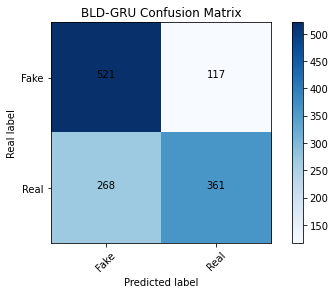

In [144]:
categories = ['Fake','Real']
BLD_GRU_cnf_matrix = confusion_matrix(y_test, BLD_GRU_y_pred)
plot_confusion_matrix(cm=BLD_GRU_cnf_matrix, classes=categories, title='BLD-GRU Confusion Matrix')
plt.show()

# Model ROC 

In [146]:
from sklearn import metrics
BLD_GRU_fpr, BLD_GRU_tpr, _ = metrics.roc_curve(y_test,BLD_GRU_y_pred)
BLD_GRU_roc_auc = metrics.auc(BLD_GRU_fpr, BLD_GRU_tpr)

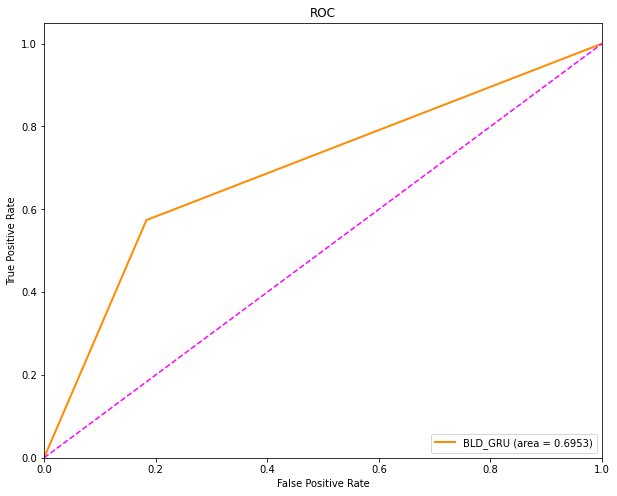

In [147]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(BLD_GRU_fpr, BLD_GRU_tpr, color='darkorange', lw=lw, label='BLD_GRU (area = %0.4f)' % BLD_GRU_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Proposed Hybrid Framework

In [148]:
from keras.callbacks import EarlyStopping
overfitCallback = EarlyStopping(monitor='val_loss',
                                min_delta=0,
                                patience=5,
                                verbose=1, mode='auto')

DCNN_SVM_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension,
                              weights=[embedding_matrix],
                              input_length=max_word_length,
                              trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),

    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),

    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv1D(256, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),

   # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

DCNN_SVM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#DCNN_SVM.pop() # this will remove the last layer
#DCNN_SVM.summary() # check the network

feature_mapping = DCNN_SVM_model(x_test)
from sklearn import svm
clf = svm.SVC()
clf.fit(feature_mapings, y)

print(DCNN_SVM_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 600, 200)          17624600  
                                                                 
 dropout_9 (Dropout)         (None, 600, 200)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 596, 32)           32032     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 149, 32)          0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 149, 32)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 145, 64)           10304     
                                                      

### Proposed Framework training 

In [149]:
number_of_epochs = 25
batch_size = 256

DCNN_SVM_model_history = DCNN_SVM_model.fit(x_train, y_train, 
                                    epochs = number_of_epochs,
                                    batch_size = batch_size,
                   validation_data=(x_test, y_test), 
                                    verbose=1)

Epoch 1/25
20/20 [==============================] - 6s 95ms/step - loss: 0.7082 - accuracy: 0.5430 - val_loss: 0.6762 - val_accuracy: 0.6243
Epoch 2/25
20/20 [==============================] - 1s 30ms/step - loss: 0.6409 - accuracy: 0.6352 - val_loss: 0.6591 - val_accuracy: 0.6346
Epoch 3/25
20/20 [==============================] - 1s 30ms/step - loss: 0.5943 - accuracy: 0.6693 - val_loss: 0.5390 - val_accuracy: 0.7577
Epoch 4/25
20/20 [==============================] - 1s 30ms/step - loss: 0.4615 - accuracy: 0.7877 - val_loss: 0.4825 - val_accuracy: 0.7656
Epoch 5/25
20/20 [==============================] - 1s 30ms/step - loss: 0.3998 - accuracy: 0.8240 - val_loss: 0.3970 - val_accuracy: 0.8256
Epoch 6/25
20/20 [==============================] - 1s 30ms/step - loss: 0.3434 - accuracy: 0.8516 - val_loss: 0.3406 - val_accuracy: 0.8508
Epoch 7/25
20/20 [==============================] - 1s 30ms/step - loss: 0.3230 - accuracy: 0.8621 - val_loss: 0.2972 - val_accuracy: 0.8777
Epoch 8/25
20

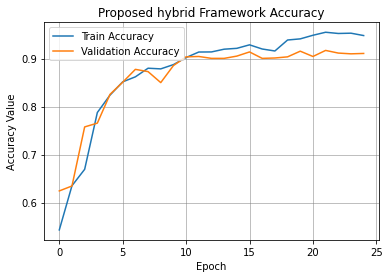

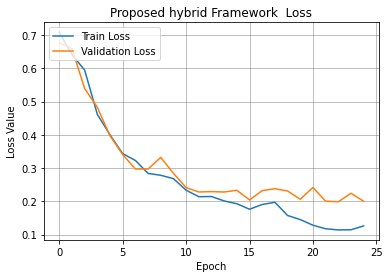

In [150]:
plt.plot(DCNN_SVM_model_history.history['accuracy'])
plt.plot(DCNN_SVM_model_history.history['val_accuracy'])
plt.title('Proposed hybrid Framework Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

plt.plot(DCNN_SVM_model_history.history['loss'])
plt.plot(DCNN_SVM_model_history.history['val_loss'])
plt.title('Proposed hybrid Framework  Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper left')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Model predication and evaluation

In [152]:
test_loss, test_acc = DCNN_SVM_model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

40/40 [==============================] - 1s 8ms/step - loss: 0.2004 - accuracy: 0.9108
Test Loss: 0.2004154771566391
Test Accuracy: 0.9108129143714905


In [153]:
DCNN_SVM_scores = DCNN_SVM_model.predict(x_test, verbose=1, batch_size=256)

5/5 [==============================] - 1s 9ms/step


In [154]:
DCNN_SVM_scores

array([[9.8002464e-01],
       [4.7104325e-04],
       [6.5919220e-02],
       ...,
       [9.9474663e-01],
       [7.9670474e-03],
       [9.5690572e-01]], dtype=float32)

In [155]:
DCNN_SVM_y_pred=np.where(DCNN_SVM_scores>0.5,1,0)


In [156]:
DCNN_SVM_y_pred


array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [157]:
print(accuracy_score(y_test, DCNN_SVM_y_pred))

0.9108129439621152


In [158]:
print(classification_report(y_test, DCNN_SVM_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       638
           1       0.93      0.89      0.91       629

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



### Confusion Matrix

In [159]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[595  43]
 [ 70 559]]


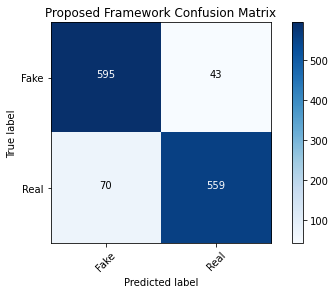

In [160]:
categories = ['Fake','Real']
DCNN_SVM_cnf_matrix = confusion_matrix(y_test, DCNN_SVM_y_pred)
plot_confusion_matrix(cm=DCNN_SVM_cnf_matrix, classes=categories, title='Proposed Framework Confusion Matrix')
plt.show()

### ROC Curve

In [161]:
DCNN_SVM_fpr, DCNN_SVM_tpr, _ = metrics.roc_curve(y_test,DCNN_SVM_y_pred)
DCNN_SVM_roc_auc = metrics.auc(DCNN_SVM_fpr, DCNN_SVM_tpr)

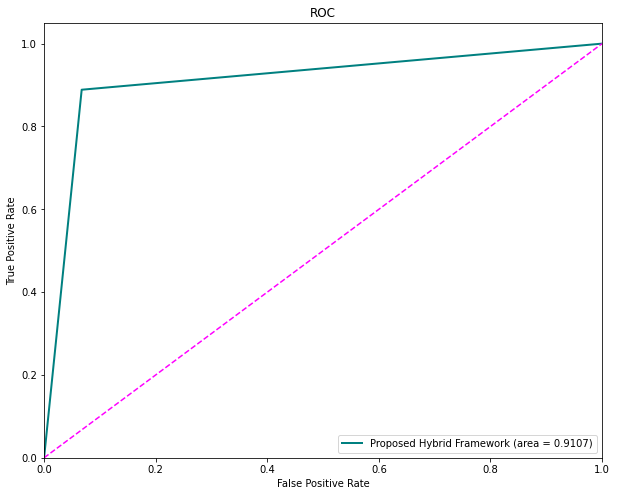

In [162]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(DCNN_SVM_fpr, DCNN_SVM_tpr, color='teal', lw=lw, label='Proposed Hybrid Framework (area = %0.4f)' % DCNN_SVM_roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Performance Evaluation ROC Curves of all Models

In [164]:
#LSTM_fpr, LSTM_tpr, _ = metrics.roc_curve(y_test,LSTM_y_pred)
#LSTM_roc_auc = metrics.auc(LSTM_fpr, LSTM_tpr)

#BiLSTM_RNN
BiLSTM_RNN_fpr, BiLSTM_RNN_tpr, _ = metrics.roc_curve(y_test,BiLSTM_RNN_y_pred)
BiLSTM_RNN_roc_auc = metrics.auc(BiLSTM_RNN_fpr, BiLSTM_RNN_tpr)

#LSTM_RNN
LSTM_RNN_fpr, LSTM_RNN_tpr, _ = metrics.roc_curve(y_test,model_y_pred)
LSTM_RNN_roc_auc = metrics.auc(LSTM_RNN_fpr, LSTM_RNN_tpr)

#BiLSTM_CNN
BiLSTM_CNN_fpr, BiLSTM_CNN_tpr, _ = metrics.roc_curve(y_test,BiLSTM_CNN_y_pred)
BiLSTM_CNN_roc_auc = metrics.auc(BiLSTM_CNN_fpr, BiLSTM_CNN_tpr)
#BLD_GRU
BLD_GRU_fpr, BLD_GRU_tpr, _ = metrics.roc_curve(y_test,BLD_GRU_y_pred)
BLD_GRU_roc_auc = metrics.auc(BLD_GRU_fpr, BLD_GRU_tpr)

#Proposed Hybrid Framework
DCNN_SVM_fpr, DCNN_SVM_tpr, _ = metrics.roc_curve(y_test,DCNN_SVM_y_pred)
DCNN_SVM_roc_auc = metrics.auc(DCNN_SVM_fpr, DCNN_SVM_tpr)


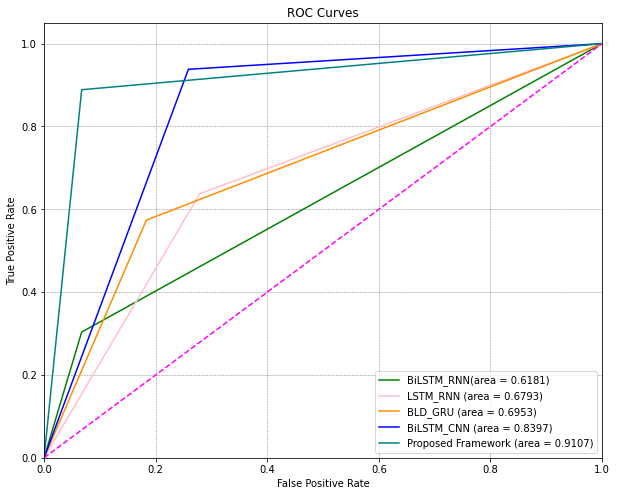

In [165]:
plt.figure(figsize=(10,8))
lw = 1.5
#plt.plot(LSTM_fpr, LSTM_tpr, color='orange', lw=lw, label='LSTM(area = %0.4f)' % LSTM_roc_auc)
plt.plot(BiLSTM_RNN_fpr, BiLSTM_RNN_tpr, color='green', lw=lw, label='BiLSTM_RNN(area = %0.4f)' % BiLSTM_RNN_roc_auc)
plt.plot(LSTM_RNN_fpr, LSTM_RNN_tpr, color='pink', lw=lw, label='LSTM_RNN (area = %0.4f)' % LSTM_RNN_roc_auc)
plt.plot(BLD_GRU_fpr, BLD_GRU_tpr, color='darkorange', lw=lw, label='BLD_GRU (area = %0.4f)' % BLD_GRU_roc_auc)
plt.plot(BiLSTM_CNN_fpr, BiLSTM_CNN_tpr, color='blue', lw=lw, label='BiLSTM_CNN (area = %0.4f)' % BiLSTM_CNN_roc_auc)
plt.plot(DCNN_SVM_fpr, DCNN_SVM_tpr, color='teal', lw=lw, label='Proposed Framework (area = %0.4f)' % DCNN_SVM_roc_auc)

plt.plot([0, 1], [0, 1], color='magenta', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()
